# 간단한 인공신경망 모델 생성
## 간단한 인공신경망 모델 생성
### 간단한 데이터 셋을 이용한 인공지능 모델 생성 예

- R의 neuralnet 패키지에서 제공되는 neuralnet 함수이용
    - 형식: neuralnet(formula, data, hidden, threshold, stepmax, rep, startweight, learningrate, algorithm)
    - formula: y~x 형식으로 반응변수와 설명변수 식
    - data: 모델 생성에 사용될 데이터 셋
    - hidden: 은닉층의 수 지정
    - threshold: 경계값 지정
    - stepmax: 인공신경망 학습을 위한 최대 스템 지정
    - rep: 인공신경망의 학습을 위한 반복 수 지정
    - startweights: 랜덤으로 초기화된 가중치를 직접 지정
    - learningrate: backpropagation 알고리즘에서 사용될 학습비율 지정
    - algorithm: backpropagation과 같은 알고리즘 적용을 위한 속성

### 패키지 설치
- 인공신경망 모델 패키지 설치

In [1]:
install.packages("neuralnet")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(neuralnet)

### 데이터 셋 생성
- iris 데이터 셋을 Train data(70%), Test data(30%)로 나누어 모델 생성 및 평가

In [3]:
data("iris")
idx= sample(1:nrow(iris), 0.7 * nrow(iris))

In [4]:
training_iris = iris[idx,]
testing_iris = iris[-idx,]

In [5]:
idx

[1]  48 140 134  61   7 110 115  30 142  55 118 141   1  70  29  77  12  98
 [19] 144 112 145 106  81   2  16  43 136 139 104 143  45  14  84  67  64  13
 [37]  72 150 103  51  82  91  44  19 109  32  88 108  25  79 105 119 129 107
 [55] 101  93  42  63 128  37  95 124  20  23  89  69  18 148  11  66 114  74
 [73] 102 131   6 126  54  99  65 120  39  49 130  24  47  58  87  38 111  22
 [91]  46  59  52  28  36  75  76  86  92  83  60  33   3 127  40

In [6]:
training_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
48,4.6,3.2,1.4,0.2,setosa
140,6.9,3.1,5.4,2.1,virginica
134,6.3,2.8,5.1,1.5,virginica
61,5.0,2.0,3.5,1.0,versicolor
7,4.6,3.4,1.4,0.3,setosa
110,7.2,3.6,6.1,2.5,virginica
115,5.8,2.8,5.1,2.4,virginica
30,4.7,3.2,1.6,0.2,setosa
142,6.9,3.1,5.1,2.3,virginica


In [7]:
testing_iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa
15,5.8,4.0,1.2,0.2,setosa
17,5.4,3.9,1.3,0.4,setosa
21,5.4,3.4,1.7,0.2,setosa
26,5.0,3.0,1.6,0.2,setosa


In [8]:
dim(training_iris)

[1] 105   5

In [9]:
dim(testing_iris)

[1] 45  5

### 수치형으로 칼럼 생성
- neuralnet 함수는 출력변수(y)가 수치형이어야 하기 때문에 기존의 Species 칼럼을 대상으로 꽃의 종(setosa, versicolor, virginica)에 따라서 1, 2, 3으로 코딩 변경하여 Species2 칼럼 생성

In [10]:
training_iris$Species2[training_iris$Species == 'setosa'] <- 1
training_iris$Species2[training_iris$Species == 'versicolor'] <- 2
training_iris$Species2[training_iris$Species == 'virginica'] <- 3
training_iris$Species <- NULL

In [11]:
head(training_iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,4.6,3.2,1.4,0.2,1
140,6.9,3.1,5.4,2.1,3
134,6.3,2.8,5.1,1.5,3
61,5.0,2.0,3.5,1.0,2
7,4.6,3.4,1.4,0.3,1
110,7.2,3.6,6.1,2.5,3


In [12]:
testing_iris$Species2[testing_iris$Species == 'setosa'] <- 1
testing_iris$Species2[testing_iris$Species == 'versicolor'] <- 2
testing_iris$Species2[testing_iris$Species == 'virginica'] <- 3
testing_iris$Species <- NULL

In [13]:
head(testing_iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
8,5.0,3.4,1.5,0.2,1
9,4.4,2.9,1.4,0.2,1
10,4.9,3.1,1.5,0.1,1
15,5.8,4.0,1.2,0.2,1


### 데이터 정규화
- 0과 1사이의 범위로 칼럼값을 정규화할 수 있는 사용자 함수(normal)를 정의하고, lapply()함수를 이용하여 학습데이터와 평가데이터의 칼럼을 대상으로 0과 1사이의 값으로 정규화

In [14]:
normal <- function(x) {
    return ( (x - min(x)) / (max(x) - min(x)) )
}

In [15]:
training_nor <- as.data.frame(lapply(training_iris,normal ))

In [16]:
summary(training_nor)

  Sepal.Length     Sepal.Width      Petal.Length     Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2353   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4412   Median :0.4167   Median :0.5763   Median :0.50000  
 Mean   :0.4543   Mean   :0.4325   Mean   :0.4654   Mean   :0.45476  
 3rd Qu.:0.6176   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
    Species2  
 Min.   :0.0  
 1st Qu.:0.0  
 Median :0.5  
 Mean   :0.5  
 3rd Qu.:1.0  
 Max.   :1.0  

In [17]:
testing_nor <- as.data.frame(lapply(testing_iris,normal ))

In [18]:
summary(testing_nor)

  Sepal.Length     Sepal.Width      Petal.Length      Petal.Width     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.1714   1st Qu.:0.2632   1st Qu.:0.07273   1st Qu.:0.04348  
 Median :0.3714   Median :0.4211   Median :0.54545   Median :0.52174  
 Mean   :0.4114   Mean   :0.4222   Mean   :0.47030   Mean   :0.48599  
 3rd Qu.:0.5714   3rd Qu.:0.5263   3rd Qu.:0.74545   3rd Qu.:0.78261  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.00000  
    Species2  
 Min.   :0.0  
 1st Qu.:0.0  
 Median :0.5  
 Mean   :0.5  
 3rd Qu.:1.0  
 Max.   :1.0  

### 인공신경망 모델 생성: 은닉노드 1개
- 은닉층의 노드가 1개을 갖는 모델 생성

In [37]:
model_net <- neuralnet(Species2 ~ Sepal.Length + Sepal.Width 
                       + Petal.Length + Petal.Width ,
                      data= training_nor, hidden = 1)

In [38]:
model_net

$call
neuralnet(formula = Species2 ~ Sepal.Length + Sepal.Width + Petal.Length + 
    Petal.Width, data = training_nor, hidden = 1)

$response
    Species2
1        0.0
2        1.0
3        1.0
4        0.5
5        0.0
6        1.0
7        1.0
8        0.0
9        1.0
10       0.5
11       1.0
12       1.0
13       0.0
14       0.5
15       0.0
16       0.5
17       0.0
18       0.5
19       1.0
20       1.0
21       1.0
22       1.0
23       0.5
24       0.0
25       0.0
26       0.0
27       1.0
28       1.0
29       1.0
30       1.0
31       0.0
32       0.0
33       0.5
34       0.5
35       0.5
36       0.0
37       0.5
38       1.0
39       1.0
40       0.5
41       0.5
42       0.5
43       0.0
44       0.0
45       1.0
46       0.0
47       0.5
48       1.0
49       0.0
50       0.5
51       1.0
52       1.0
53       1.0
54       1.0
55       1.0
56       0.5
57       0.0
58       0.5
59       1.0
60       0.0
61       0.5
62       1.0
63       0.0
64       0.0
65       0.5

### 인공신경망 모델 생성 : 시각화
- 입력층에서 4개의 입력변수에 대한 가중치와 경계값(bias) 가중치가 은닉층 으로 전달되고, 은닉층의 결과에 대한 가중치와 경계값 가중치가 출력층으로 전달

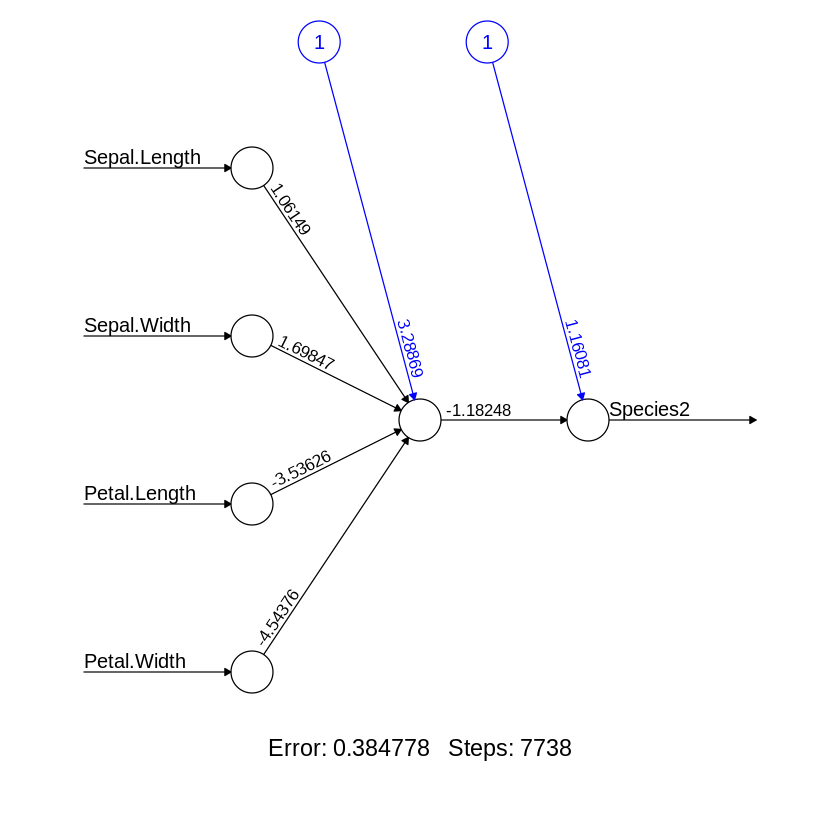

In [39]:
## If you just want the single plot with the smallest error, then specifying rep = "best" seems to help, as in this sample R Markdown document:
## rep = "best" 추가
plot(model_net, rep = "best")

### 분류모델 성능 평가
- 모델의 예측치 생성: compute 함수 이용
- 상관관계 분석: 상관계수로 두 변수 간 선형관계의 강도 측정
- 모델의 예측치 `model_result$net.result` 와 평가 데이터의 y변수를 이용하여 피어슨 상관계수로 분류 정확도 계산

In [40]:
model_result <- compute(model_net , testing_nor[c(1:4)])

In [41]:
model_result$net.result

0.0075961211
-0.0059384065
-0.0016839986
0.0130329861
0.0003988805
-0.0140244374
-0.0068234246
-0.0015405325
0.0085343815
0.0096588981
0.0077001457


In [42]:
cor(model_result$net.result, testing_nor$Species2)

0.9654653
